In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('Speed_Dating_Data.csv', encoding="ISO-8859-1")

# Présentation du dataset et EDA



In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8378, 195)

In [5]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,...,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN,UC Berkeley,"1,400.00","26,908.00",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,107,403,241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,NaN,7.662488,NaN,NaN,NaN,2.757186,...,7.332191,0.780825,0.981631,0.376950,1.230615,0.934132,24.384524,16.588583,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837,25.610341,10.751267,11.524839,14.276783,9.207503,11.253802,24.970936,10.923285,11.952687,14.959108,9.526191,11.966270,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.566763,NaN,3.758935,NaN,NaN,NaN,1.230905,...,1.521854,1.611694,1.382139,0.484683,1.294557,0.753902,13.712120,7.471537,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985,17.477134,5.740351,6.004222,6.927869,6.385852,6.516178,17.007669,6.226283,7.010650,7.935509,6.403117,7.012067,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,

In [6]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [7]:
100*(df.isnull().sum()/len(df))

iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


### GENRE


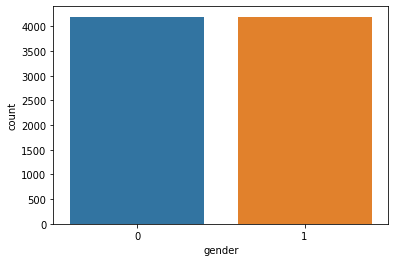

In [9]:
sns.countplot(df['gender'])

In [10]:
df['gender'].value_counts()

1    4194
0    4184
Name: gender, dtype: int64

Il y a autant d'hommes et de femmes dans le dataset.


### AGE


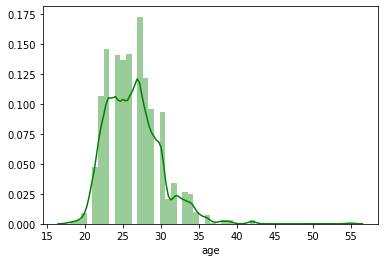

In [11]:
sns.distplot(df['age'], color='green')

La majorité des participants ont entre 20 et 30 ans.


### MATCH

In [12]:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

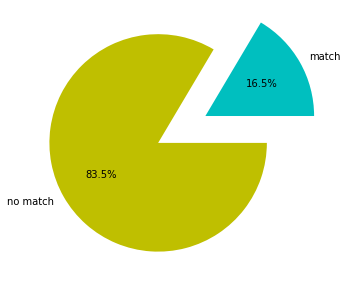

In [13]:
labels ='match', 'no match'
values=[1380,6998]
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors='cyan',explode=(0.5,0))
plt.show()

16.5% des participants ont obtenu un second rendez-vous suite au speed dating.


### GESTION DES DONNÉES MANQUANTES
Ce dataset comprend beaucoup de données NaN, retirons les colonnes avec plus de 50% de données manquantes (plus de 4000 données manquantes)

In [14]:
date = df.iloc[:,:35]

In [15]:
date.shape

(8378, 35)

In [16]:
date.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
dtype: int64

Retirons les deux variables restantes ayant beaucoup de données null (positin1 et shar_o) et id (double de idd)



In [17]:
date= date.drop(['shar_o','id', 'positin1'], axis=1 )

In [18]:
date.isnull().sum()

iid           0
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field        63
dtype: int64

In [19]:
date = date.dropna()

In [20]:
date.isnull().sum()

iid         0
gender      0
idg         0
condtn      0
wave        0
round       0
position    0
order       0
partner     0
pid         0
match       0
int_corr    0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
like_o      0
prob_o      0
met_o       0
age         0
field       0
dtype: int64

### EXPLICATION DES MATCHS AU TRAVERS DE LA DATAVIZ


#### Données sociodémographiques

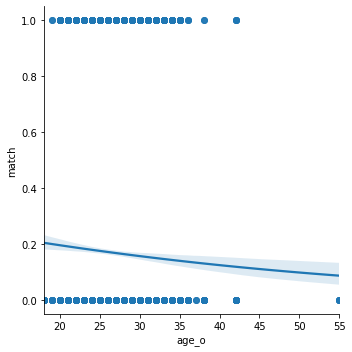

In [21]:
sns.lmplot(x = 'age_o', y = 'match', data=date, logistic=True)

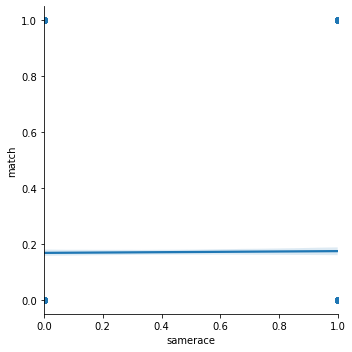

In [22]:
sns.lmplot(x = 'samerace', y = 'match', data=date, logistic=True)

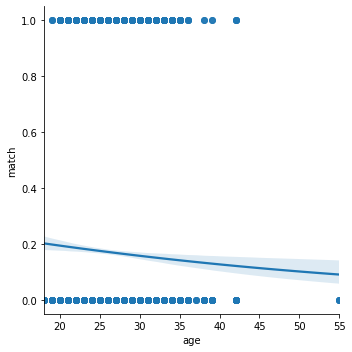

In [23]:
sns.lmplot(x = 'age', y = 'match', data=date, logistic=True)

L'age et la nationalité ne sont pas des variables pertinentes pour expliquer les matchs 

#### Autres données (physique , caractère, intérêt)

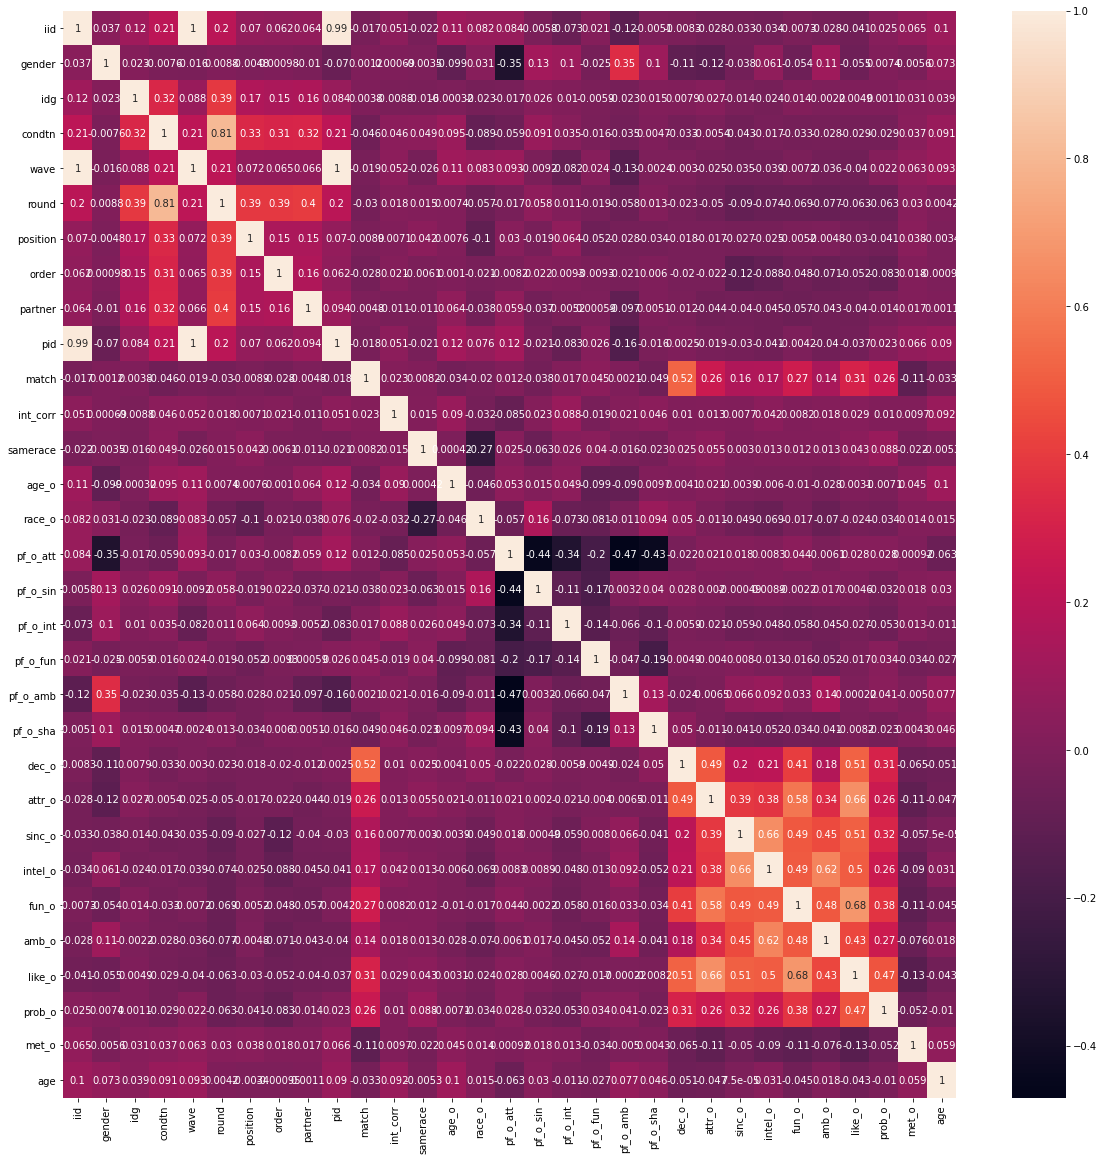

In [24]:
corr = date.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, ax=ax)


Selon la matrice de corrélation, la variable match est corrélée majoritairement à la variable 'décision du partenaire'.

<Figure size 720x720 with 0 Axes>

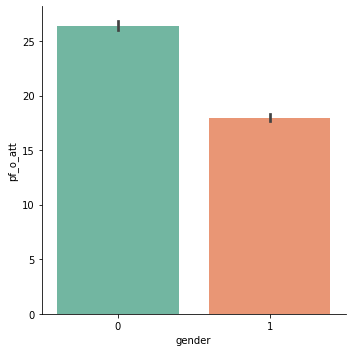

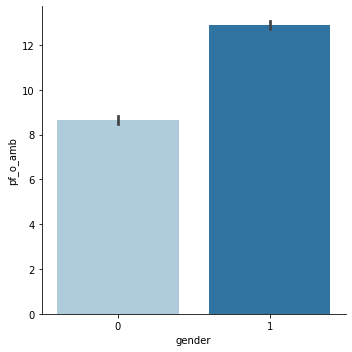

In [25]:

plt.figure(figsize=(10,10))

sns.catplot(x ='gender', y = 'pf_o_att', data=date, kind='bar',palette='Set2')


sns.catplot(x ='gender', y = 'pf_o_amb', data=date, kind='bar', palette=('Paired'))


plt.show()

Parmi les qualités attendues, la beauté est plus importante pour l'homme et l'ambition plus importante pour la femme.

In [26]:
decision = date['dec_o'].apply(lambda x: 'Oui' if x==1
                               else 'Non')
decision.value_counts()

Non    4047
Oui    3044
Name: dec_o, dtype: int64

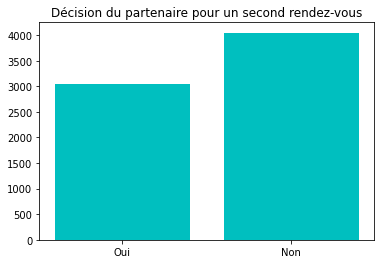

In [27]:
names = ['Oui', 'Non']
values= [3044,4047]

plt.bar(names, values, color='c')
plt.title("Décision du partenaire pour un second rendez-vous") 
plt.show()

In [28]:
decision_genre = date.groupby('gender')['dec_o'].sum()
decision_genre

gender
0    1720
1    1324
Name: dec_o, dtype: int64

Les femmes acceptent moins un second rendez-vous

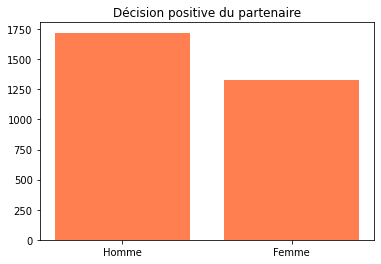

In [29]:
names2 = ['Homme', 'Femme']
values2= [1720,1324]
plt.bar(names2, values2, color='coral')
plt.title("Décision positive du partenaire") 
plt.show()

#### Importance des différents critères

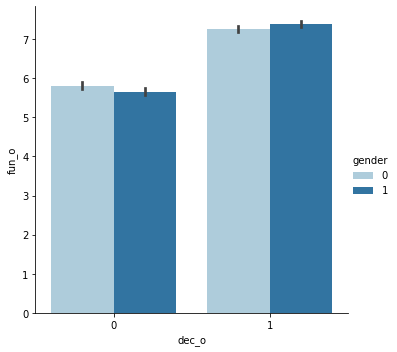

In [30]:

sns.catplot(x="dec_o", y="fun_o", data=date, kind='bar', hue='gender', palette='Paired')

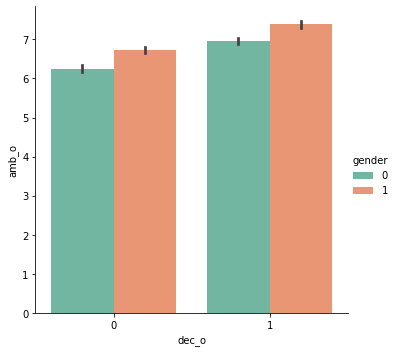

In [31]:
sns.catplot(x="dec_o", y="amb_o", data=date, kind='bar', hue='gender', palette='Set2')

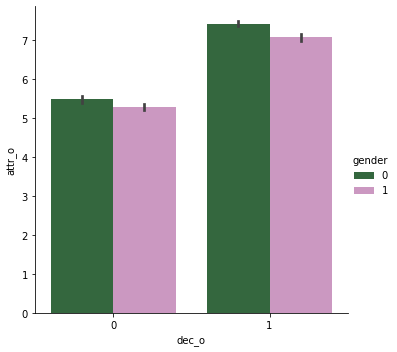

In [32]:
sns.catplot(x="dec_o", y="attr_o", data=date, kind='bar', hue='gender', palette='cubehelix')

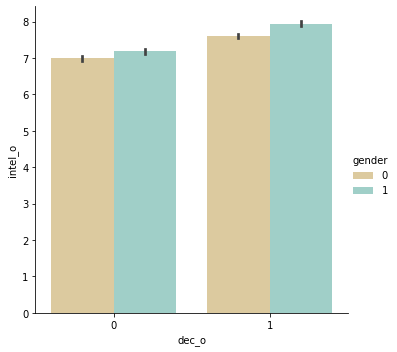

In [33]:
sns.catplot(x="dec_o", y="intel_o", data=date, kind='bar', hue='gender', palette='BrBG')

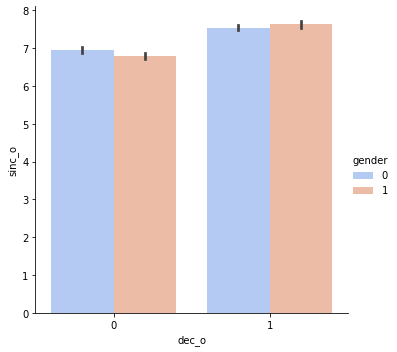

In [34]:
sns.catplot(x="dec_o", y="sinc_o", data=date, kind='bar', hue='gender', palette='coolwarm')

Les critères 'drôle' et 'beauté' sont les plus importants pour expliquer une décision positive du partenaire. Voyons si elles sont aussi importantes pour un match.


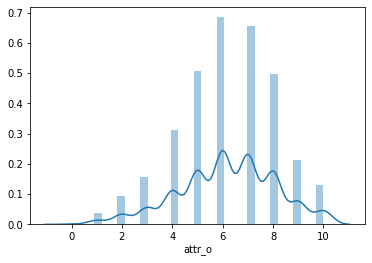

In [35]:
sns.distplot(date['attr_o'])

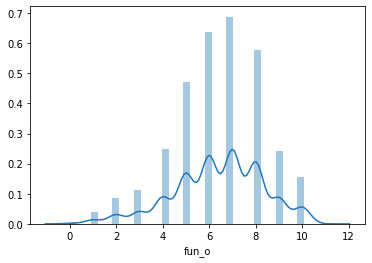

In [36]:
sns.distplot(date['fun_o'])

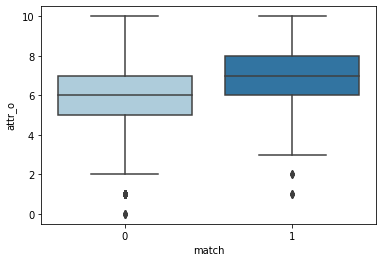

In [37]:
sns.boxplot(x="match", y="attr_o", data=date, palette='Paired')

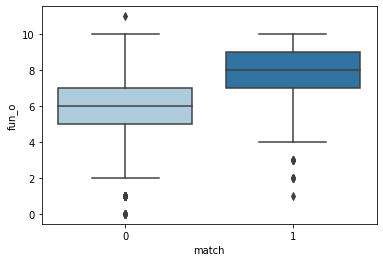

In [38]:
sns.boxplot(x="match", y="fun_o", data=date, palette='Paired')

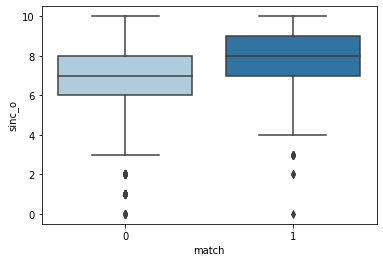

In [39]:
sns.boxplot(x="match", y="sinc_o", data=date, palette='Paired')

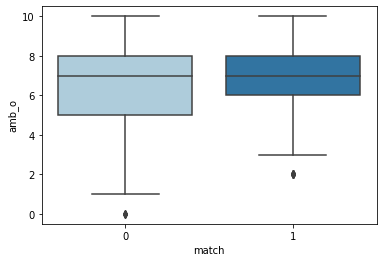

In [40]:
sns.boxplot(x="match", y="amb_o", data=date, palette='Paired')

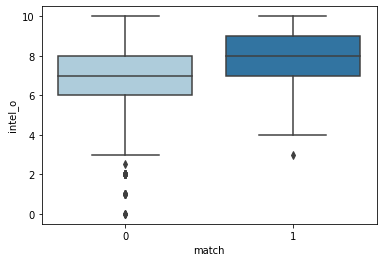

In [42]:
sns.boxplot(x="match", y="intel_o", data=date, palette='Paired')

L'humour joue un rôle important sur l'obtention d'un second rendez-vous.

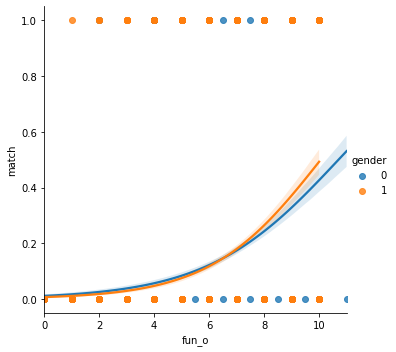

In [44]:
sns.lmplot(x = 'fun_o', y = 'match', data=date, logistic=True, hue='gender')

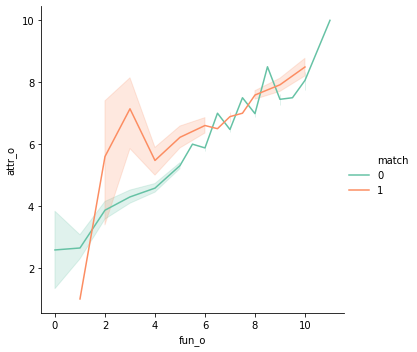

In [53]:
sns.relplot(x='fun_o', y='attr_o', data=date, hue='match', kind='line', palette='Set2')

Si le premier critère d'un match semble la beauté, l'humour est un second critère important.

